# Проект 2. Разведывательный анализ данных

Вы работаете в крупной корпорации в сфере FMCG (Fast-Moving Consumer Goods) на позиции Junior Data Scientist.

Рынок бурлит новыми идеями и продуктами: даже Mars экспериментируют со второй палочкой Twix. Ваша компания не можете отставать, поэтому руководство решило запустить новую линейку продуктов. Было подготовлено несколько новых вариантов шоколадных батончиков, которые по прогнозам создателей должны взорвать рынок. Но насколько верны их предсказания?

Итак, перед вами поставили задачу создать модель, которая бы предсказывала оценку нового продукта конечными пользователями.

Данные о тестировании батончиков конкурентов собраны, можно приступать к задаче!



### Разведывательный анализ данных (EDA)

Основные цели EDA:

- Сформулировать предположения и гипотезы для дальнейшего построения модели.
- Проверить качество данных и очистить их, если это необходимо.
- Определиться с параметрами модели.


Можно выделить **основные шаги**:

1. Посмотреть на данные.
2. Проверить данные на пустые значения.
3. Проверить данные на дублированные/полностью скоррелированные значения.
4. Проверить данные на наличие выбросов.
5. Отобрать данные, пригодные для дальнейшего построения модели.
6. Снова и снова возвращаться к предыдущим пунктам, пока модель не заработает как надо.


In [286]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from IPython.core.display import display
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.csv')

- Bar id — ID батончика в базе данных
- Company (Maker-if known) — название компании, изготовившей батончик.
- Specific Bean Origin or Bar Name — точное место происхождения какао-бобов.
- Broad Bean Origin — название региона, где были выращены какао-бобы.
- Company Location — страна, в которой произведён шоколадный батончик.
- Bean Type — вид какао-бобов, используемых в батончике.
- REF — числовое значение, показывающее, как давно ревью было добавлено в базу. Чем выше значение, тем более свежее
ревью.
- Review Date — год публикации рецензии.
- Cocoa Percent — процент какао в шоколаде.
- Rating — оценка батончика фокус-группой.


In [287]:
display(cacao.head(10))
cacao.info()

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [288]:
# Сколько в датасете числовых столбцов?
# Сколько в датасете строковых столбцов?

# dtypes: float64(1), int64(3), object(6)
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB



## исправление названий колонок в датафрейме

In [289]:
cacao.columns
cacao.columns = [
    'bar_id',
    'company',
    'specific_origin',
    'ref',
    'review_date',
    'cocoa_percent',
    'company_location',
    'rating',
    'bean_type',
    'broad_origin'
]
cacao.columns

Index(['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'broad_origin'],
      dtype='object')


## Bar_id - ID батончика в базе данных

1795


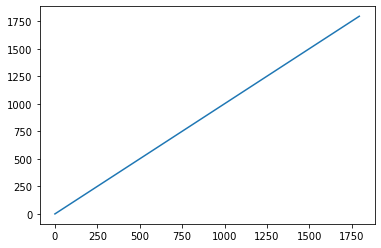

In [290]:
if 'bar_id' in cacao.columns:
    print(cacao.bar_id.nunique())
    plt.plot(cacao.bar_id)

    # удаляем как ненужные данные в анализе
    cacao.drop(['bar_id'], inplace = True, axis = 1)


## company - название компании, изготовившей батончик.

In [291]:
companies = pd.DataFrame(cacao.company.value_counts())
display(companies)

,company
,99
Soma,45
Bonnat,26
Fresco,26
Pralus,25
...,...
Pinellas,1
Choocsol,1
Cacao Market,1
Green & Black's (ICAM),1


In [292]:
cacao.company = cacao.company.apply(
    lambda x: None if (x is None) or (x.strip() == '') else x)

display(pd.DataFrame(cacao.company.value_counts()))

print(
    "Значений, встретившихся в столбце более 10 раз:", #Число 10 взято для ориентира, можно брать другое
    (cacao.company.value_counts()>10).sum()
)

cacao.loc[:, ['company']].info()

,company
Soma,45
Bonnat,26
Fresco,26
Pralus,25
Domori,22
...,...
Mita,1
Love Bar,1
Malagasy (Chocolaterie Robert),1
Fearless (AMMA),1


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


In [293]:
print('''
    407 - уникальных значений
    99 - производитель неизвестен
    30 - компаний у которых в рейтинге больше 10 батончиков
''')


    407 - уникальных значений
    99 - производитель неизвестен
    30 - компаний у которых в рейтинге больше 10 батончиков




## specific_origin - точное место происхождения какао-бобов.

In [294]:
cacao.specific_origin = cacao.specific_origin.apply(
    lambda x: None if (x is None) or (x.strip() == '') else x)
pd.DataFrame(cacao.specific_origin.value_counts())

,specific_origin
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
Venezuela,21
...,...
"Mid Mountain, 2014",1
"Tanzania, Party Bar",1
Grand 'Anse,1
"La Dalia, Matagalpa,cacao Bisesto,green label",1


In [295]:
print(
    "Значений, встретившихся в столбце более 10 раз:", #Число 10 взято для ориентира, можно брать другое
    (cacao.specific_origin.value_counts()>10).sum()
)
cacao.loc[:, ['specific_origin']].info()

Значений, встретившихся в столбце более 10 раз: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   specific_origin  1737 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


In [296]:
print('''
    1012 - уникальных значений
    58 - производитель неизвестен
    15 - компаний у которых в рейтинге больше 10 батончиков
''')


    1012 - уникальных значений
    58 - производитель неизвестен
    15 - компаний у которых в рейтинге больше 10 батончиков




## ref — числовое значение, показывающее, как давно ревью было добавлено в базу. Чем выше значение, тем более свежее
ревью.

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

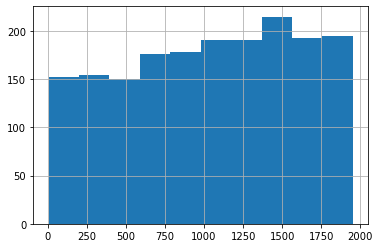

In [297]:
cacao.ref.hist()
cacao.ref.describe()

In [298]:
# Содержит ли этот столбец выбросы?

Q1 = cacao.ref.quantile(0.25, interpolation='midpoint')
Q3 = cacao.ref.quantile(0.75, interpolation='midpoint')
IQR = Q3 - Q1
#              down limit                 up limit
cacao.query('(@Q1 - 1.5*@IQR) > ref | ref > (@Q3 + 1.5*@IQR)')

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin



## cocoa_percent — процент какао в шоколаде

In [299]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(
    lambda x: float(x.replace('%', '') if type(x) != float else x))
display(cacao.cocoa_percent)

0        63.0
1        70.0
2       670.0
3        70.0
4        70.0
        ...  
1790     70.0
1791     65.0
1792     65.0
1793     62.0
1794     65.0
Name: cocoa_percent, Length: 1795, dtype: float64

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

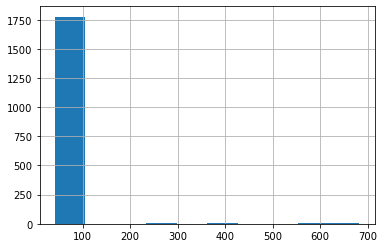

In [300]:
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


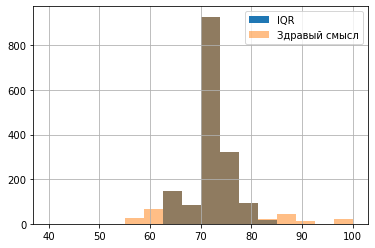

In [301]:
median = cacao.cocoa_percent.median()
Q1 = cacao.cocoa_percent.quantile(0.25)
Q3 = cacao.cocoa_percent.quantile(0.75)
# Q1 = cacao.cocoa_percent.quantile(0.25, interpolation='midpoint')
# Q3 = cacao.cocoa_percent.quantile(0.75, interpolation='midpoint')
IQR = Q3 - Q1
DL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR
print(
    '25-й перцентиль: {},'.format(Q1),
    '75-й перцентиль: {},'.format(Q3),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=DL, l=UL)
)

cacao.cocoa_percent.loc[cacao.cocoa_percent.between(DL, UL)].hist(
    bins=16, range=(40,100), label='IQR')

cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(
    alpha =0.5, bins = 16, range=(40, 100), label='Здравый смысл')

plt.legend()

In [302]:
cacao = cacao.loc[cacao.cocoa_percent <= 100]
cacao

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,11.50,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,,India



## company_location - страна, в которой произведён шоколадный батончик.

In [303]:
cacao.company_location

0        France
1        France
3        France
4        France
5        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: company_location, Length: 1776, dtype: object

In [304]:
display(pd.DataFrame(cacao.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum())
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
India,1
Wales,1
Philippines,1
Russia,1


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1776 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB



## rating - оценка батончика фокус-группой.

In [305]:
cacao.rating

0       11.50
1        2.75
3        3.50
4        3.50
5        2.75
        ...  
1790     3.75
1791     3.00
1792     3.50
1793     3.25
1794     3.00
Name: rating, Length: 1776, dtype: float64

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

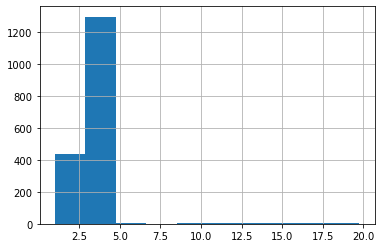

In [306]:
cacao.rating.hist()
cacao.rating.describe()

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


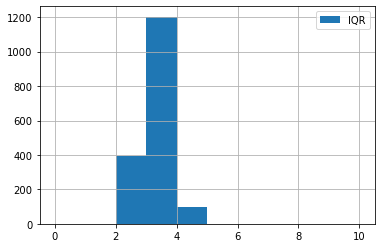

In [307]:
median = cacao.rating.median()
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
# perc25 = cacao.rating.quantile(0.25, interpolation='midpoint')
# perc75 = cacao.rating.quantile(0.75, interpolation='midpoint')
print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(
        f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(
    bins = 10, range = (0, 10), label = 'IQR')

plt.legend();

In [308]:
cacao = cacao.loc[
    cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
]


# bean_type - вид какао-бобов, используемых в батончике.


In [309]:
cacao.bean_type = cacao.bean_type.astype(str).apply(
    lambda x: None if x is None or x.strip() == '' else x
)

/Users/Oleg/.conda/envs/SkillFactory/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [310]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  861 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [311]:
cacao.bean_type = cacao.bean_type.apply(
    lambda x: None
        if pd.isnull(x)
        else None if x == 'nan'
        else x if '(' not in x
        else x[:x.find('(')].strip()
)

/Users/Oleg/.conda/envs/SkillFactory/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [312]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
Beniano,3
Matina,3
EET,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB



# broad_origin - название региона, где были выращены какао-бобы.


In [313]:
def fix_countries(x):
    if pd.isnull(x):
        return x

    if x == 'nan':
        return None

    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')

    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)

    x = x.replace('Guat.', 'Guatemala')

    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')

    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')

    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')

    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')

    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')

    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')

    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')

    x = x.replace('PNG', 'PapuaNewGuinea')

    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')

    x = x.replace('Haw.', 'Hawaii')

    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')

    return x

cacao.broad_origin = cacao.broad_origin.apply(fix_countries).sort_values()

/Users/Oleg/.conda/envs/SkillFactory/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [314]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()


,broad_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
DominicanRepublic,135
...,...
"Venezuela,Africa,Brasil,Peru,Mexico",1
"Venezuela,Ecuador,Peru,Nicaragua",1
"Venezuela,Trinidad,Ecuador",1
Nigeria,1


Значений, упомянутых более 10 раз: 26
Уникальных значений: 94
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB



# Корреляционный анализ


,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


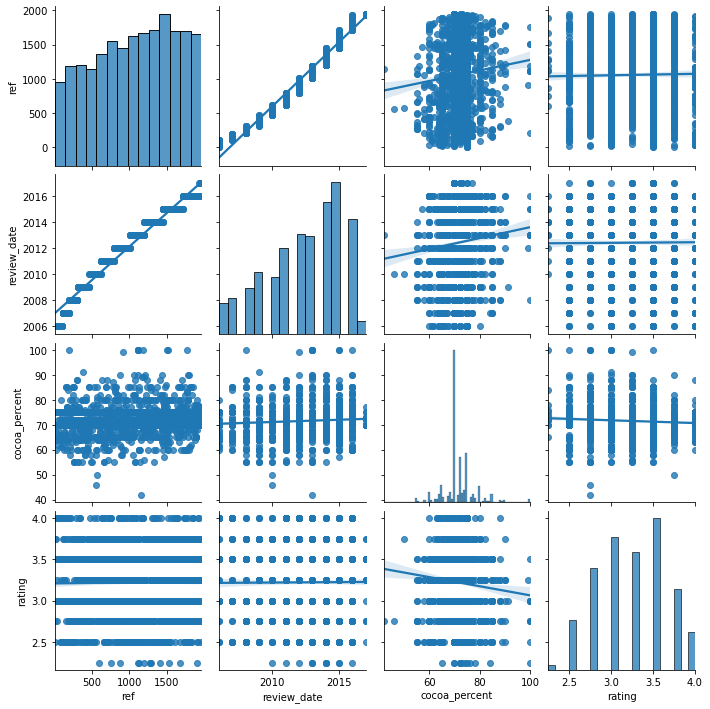

In [315]:
sns.pairplot(cacao, kind='reg')
cacao.corr()


# Анализ номинативных переменных

#### Номинативные переменные, которые осталось рассмотреть:
- company
- specific_origin
- company_location
- bean_type
- broad_origin


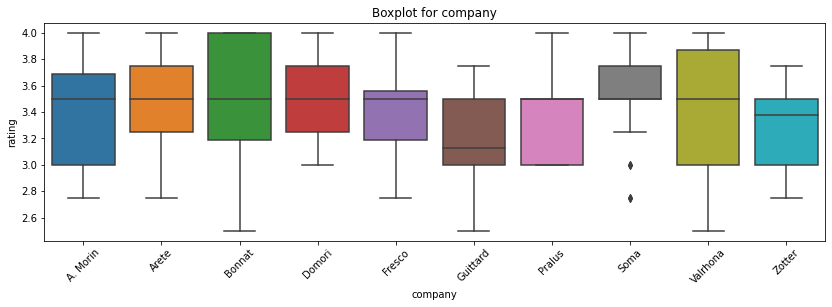

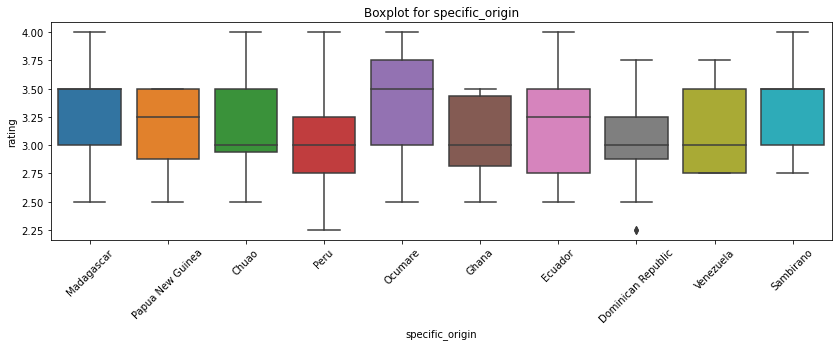

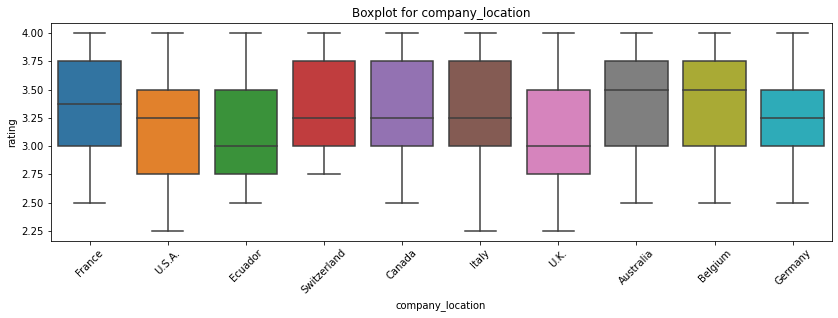

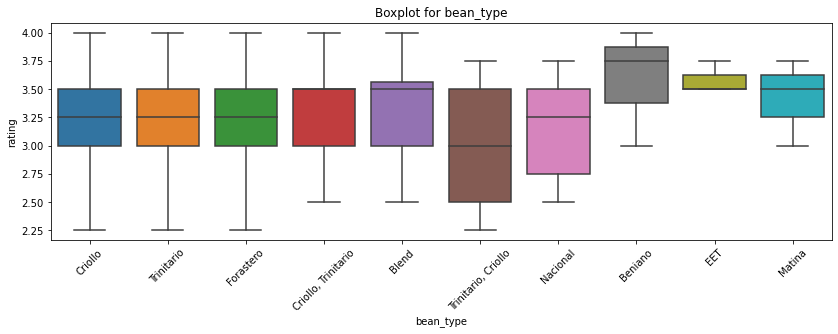

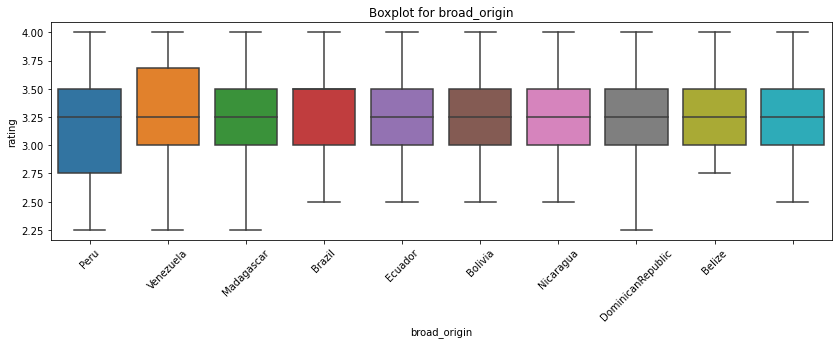

In [317]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(
        x=column,
        y='rating',
        data=cacao.loc[
            cacao.loc[:, column].isin(
                cacao.loc[:, column].value_counts().index[:10]
            )
        ],
        ax=ax
    )
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)



###  тест Стьюдента (T-Test)


In [321]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'],
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


In [322]:
cacao_for_model = cacao.loc[:,
                   ['company',
                    'specific_origin',
                    'company_location',
                    'review_date',
                    'cocoa_percent']]

cacao_for_model.head()

,company,specific_origin,company_location,review_date,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
6,A. Morin,Cuba,France,2014,70.0




# Выводы

Настало время подвести выводы.

Итак, в результате EDA для анализа влияния параметров шоколада на экспертную оценку шоколадных батончиков были получены следующие выводы:

- В данных достаточно мало пустых значений, только столбец `bean_type` был заполнен в малом количестве случаев.
- Выбросы найдены только в столбцах с рейтингом и содержанием какао в шоколаде батончиков, что позволяет сделать вывод
 о том, что данные достаточно чистые.
- Положительная корреляция параметра `review_date` и `rating` может говорить о том, что с годами рейтинги потихоньку
завышаются, либо батончики становятся лучше.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это `company`,
`specific_origin`, `company_location`, `review_date` и `cocoa_percent`.
